<a href="https://colab.research.google.com/github/namoshi/mathAI/blob/master/convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch.nn import Conv2d
import matplotlib.pyplot as plt
import numpy as np

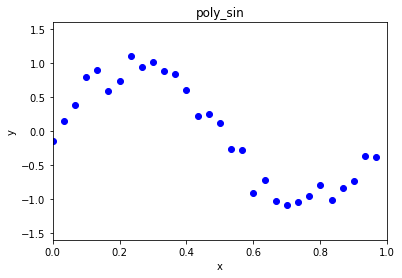

In [2]:
N = 30
x = np.arange(0, 1, 1.0/N)
y =  np.sin(2*np.pi*x) + np.random.normal(0,0.2,N)

plt.plot(x, y, 'bo') 
plt.xlim(0.0, 1.0)
plt.ylim(-1.6, 1.6)
plt.title("poly_sin")
plt.xlabel('x')
plt.ylabel('y')
#plt.savefig('poly_sin.eps')
plt.show()
plt.close()

In [3]:
# Define Convolutional Filter
m = torch.nn.Conv1d(1, 1, 3, stride=1, padding=1)
print(m.bias)
print(m.weight)
m.bias[0] = 0.0
m.weight[0][0][0] = 1.0/4.0
m.weight[0][0][1] = 2.0/4.0
m.weight[0][0][2] = 1.0/4.0
print(m.bias)
print(m.weight)

Parameter containing:
tensor([-0.1550], requires_grad=True)
Parameter containing:
tensor([[[ 0.1283, -0.0992, -0.1040]]], requires_grad=True)
Parameter containing:
tensor([0.], grad_fn=<CopySlices>)
Parameter containing:
tensor([[[0.2500, 0.5000, 0.2500]]], grad_fn=<CopySlices>)


In [4]:
input = torch.from_numpy(y.reshape((1,1,N)).astype(np.float32)).clone()
output = m(input)
print(input)
print(output)
yest = output[0][0].to('cpu').detach().numpy().copy()
print(x.shape)
print(yest.shape)

tensor([[[-0.1476,  0.1434,  0.3808,  0.8002,  0.8966,  0.5837,  0.7371,
           1.1023,  0.9444,  1.0233,  0.8811,  0.8356,  0.6049,  0.2267,
           0.2465,  0.1174, -0.2702, -0.2742, -0.9040, -0.7176, -1.0231,
          -1.0903, -1.0381, -0.9517, -0.7937, -1.0166, -0.8365, -0.7305,
          -0.3638, -0.3778]]])
tensor([[[-0.0379,  0.1300,  0.4263,  0.7195,  0.7943,  0.7003,  0.7900,
           0.9715,  1.0036,  0.9680,  0.9053,  0.7893,  0.5680,  0.3262,
           0.2093,  0.0528, -0.1743, -0.4306, -0.6999, -0.8406, -0.9635,
          -1.0605, -1.0295, -0.9338, -0.8889, -0.9158, -0.8550, -0.6653,
          -0.4590, -0.2798]]], grad_fn=<SqueezeBackward1>)
(30,)
(30,)


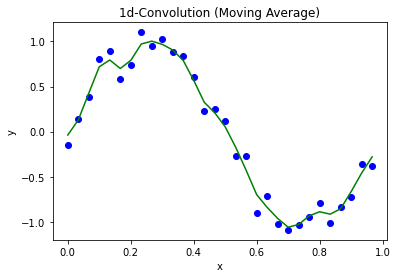

In [5]:
plt.plot(x, y, 'bo') 
plt.plot(x, yest,'g-')
plt.title("1d-Convolution (Moving Average)")
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('1d-conv.png')
plt.show()
plt.close()